In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# My excel link is different from yours, mines prob wrong, its ok for now i dont think it changes anything
tickers = pd.read_excel('https://www.ssga.com/us/en/institutional/ic/library-content/products/fund-data/mf/us/holdings-monthly-us-en-svspx.xlsx', header = 2).Ticker.dropna().to_list()
data = yf.download(tickers = tickers, period = '1y')['Adj Close']
sp500 = data.dropna(how= 'all', axis= 1)
sp500


[*********************100%%**********************]  504 of 504 completed


4 Failed downloads:
['R_SP50', 'K.WI', 'BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=1y)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-25,155.858902,14.50,147.286743,153.422043,97.669998,104.862236,58.730000,291.764496,334.299988,164.009933,...,74.346367,67.430794,109.472382,30.998371,112.042793,124.780663,118.303673,271.899994,49.282761,148.743179
2022-11-28,151.231567,13.83,143.418365,152.278244,95.300003,103.323029,58.020000,286.055206,328.970001,160.986725,...,77.590889,67.198380,106.184631,29.993979,108.202736,124.701775,116.775383,269.000000,47.835228,146.790985
2022-11-29,149.881119,14.14,140.385330,152.057190,95.379997,102.940681,58.980000,283.476196,326.779999,160.868927,...,79.664619,66.675423,106.890533,29.747803,108.469276,124.297440,118.095261,266.820007,48.597095,146.513535
2022-11-30,153.892776,14.43,147.207184,154.921463,102.139999,105.470078,59.910000,296.223663,344.929993,168.741089,...,83.008369,68.002151,107.664124,29.797039,110.907562,126.881226,119.186905,270.279999,49.349430,152.746658
2022-12-01,155.024765,13.98,147.485626,155.354019,101.269997,105.813210,59.759998,298.093933,344.109985,168.319000,...,83.385406,67.973114,107.141953,30.958986,112.338951,127.403893,122.412201,268.820007,49.511322,155.224060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,113.150002,12.29,189.690002,138.300003,127.150002,99.550003,83.599998,327.829987,602.659973,183.050003,...,86.870003,60.560001,104.959999,29.690001,100.830002,127.660004,111.669998,218.020004,36.070000,174.800003
2023-11-20,113.980003,12.40,191.449997,138.309998,129.699997,101.199997,84.459999,330.899994,612.700012,183.820007,...,87.169998,60.060001,104.500000,29.940001,100.209999,128.119995,112.500000,220.539993,35.779999,176.059998
2023-11-21,123.919998,12.13,190.639999,138.729996,126.820000,101.910004,86.129997,330.260010,610.989990,181.250000,...,86.860001,60.020000,104.459999,30.990000,101.019997,128.240005,112.900002,222.410004,34.310001,178.729996


<Axes: xlabel='Date'>

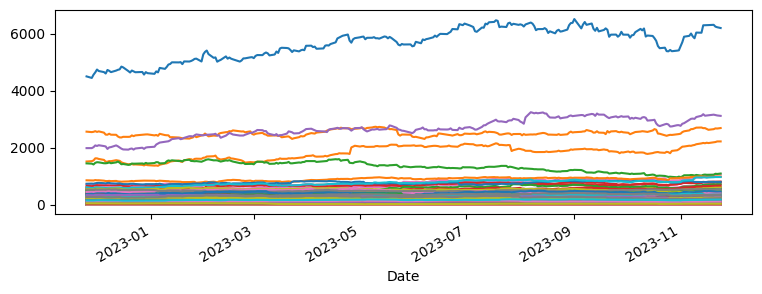

In [3]:

# I graphed each stock in sp500, to visualize the lines were analyzing
# Our trend line would follow Y = mx+b, we need the slope for each stock
sp500.plot(figsize = (9,3),legend= None) 

In [4]:
# Slope is our (y2-y1)[change of price] 
# divided by (x1-x2)[change of 1 year]
open_price = sp500.iloc[0] # first data entry
close_price = sp500.iloc[-1] # most recent data entry
price_difference = close_price - open_price
# Since our change of time is 1 year, im just going to divide by count of rows
slope = price_difference / len(sp500) * 100
slope

A      -11.648964
AAL     -0.872510
AAPL    17.005282
ABBV    -5.877309
ABNB    12.231074
          ...    
YUM      1.485790
ZBH     -1.941702
ZBRA   -17.123504
ZION    -5.949308
ZTS     12.536585
Length: 500, dtype: float64

In [5]:
# Im assuming 260 day low refers to trading days in year
# Since we have roughly 251 rows of data, well get the low of what we have already
# Take the difference with our current price, then divide over the low
present_low_change = close_price - sp500.min()
percent_above_260 = (present_low_change / sp500.min()) * 100
percent_above_260 

A       25.155684
AAL     12.728941
AAPL    52.801028
ABBV     6.867946
ABNB    55.618861
          ...    
YUM     10.546232
ZBH     10.426401
ZBRA    15.621997
ZION    79.574506
ZTS     27.643625
Length: 500, dtype: float64

In [6]:
# Close - 4wk low , divided by 4week high - 4week low)
# subtract 
# Close - 52wk low , divided by 52week high - 52week low)
# notice the equation is same
# time period changes, im just gonna run a for loop with the formula
# and change the times for 4wk (20 data entries) and 52wk(all data entries)
data_indexes = (20, len(sp500))
oscillator_ratios = []
for index in data_indexes:
    close_minus_low= close_price - sp500[-index:].min()
    ratio = close_minus_low / (sp500[-index:].max() - sp500[-index:].min())
    oscillator_ratios.append(ratio)

oscillator = (oscillator_ratios[0] - oscillator_ratios[1]) *100
oscillator


#Note : he doesnt want us to use for loops but this one only loops twice, 
# and I only did it because the formula is redundant so I didnt want to write it twice 

A       55.358470
AAL     75.027089
AAPL     2.008626
ABBV    -9.192812
ABNB    26.714148
          ...    
YUM     47.059163
ZBH     71.078784
ZBRA    78.917598
ZION    29.172550
ZTS     23.665505
Length: 500, dtype: float64

In [7]:
# 39 week returns sounds simple
# im going to use 5 data entries per week so were looking at 39 * 5, 195 data entries

price_39_weeks_ago = sp500.iloc[-195] # 195 data entries away (39 weeks | 5 entries per week)
price_difference_39_weeks = close_price - price_39_weeks_ago
price_difference_39_weeks # I think this is all we need for the return, right?



A       -20.839363
AAL      -4.079999
AAPL     36.880997
ABBV     -6.420105
ABNB    -11.050003
           ...    
YUM      -1.388916
ZBH     -10.964272
ZBRA   -104.520004
ZION    -14.973442
ZTS       7.447250
Length: 500, dtype: float64

In [8]:
# 51 week volume price trend 
# Multiply weekly avg volume by percent change in price each of the past 51 weeks

# Can we just use std for volume?
# vpt = sum of (the weekly volumes * weekly price change )

In [35]:

sp500.index = pd.to_datetime(sp500.index)

# Just found out i can Resample to weekly frequency and calculate the mean and volume that way -_-. 
# 'W' stands for week
weekly_means = sp500.resample('W').mean()
weekly_std = sp500.resample('W').std()

vpt = weekly_means.pct_change() * weekly_std # Not sure if correct formula 
volume_price_trend = vpt.sum() 




/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1669/1023573661.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vpt = weekly_means.pct_change() * weekly_std # Not sure if correct formula


In [20]:
# Made a neat table that can help with 
# calculations and saving our momentum factors


test = sp500.copy().transpose()

volume = sp500.std()
test['Volume'] = volume
means = sp500.mean()
test['Mean'] = means



new_table = test[['Volume', 'Mean']]
new_table # Needs a name



Date,Volume,Mean
A,15.560962,129.459616
AAL,1.864536,14.546614
AAPL,18.706942,166.702037
ABBV,7.602266,146.287716
ABNB,15.737654,120.048705
...,...,...
YUM,5.031745,129.325894
ZBH,10.678855,125.129950
ZBRA,33.470811,270.842988
ZION,8.435598,35.796126


In [36]:
new_table['Slope 52 Week Trend-Line'] = slope
new_table['Percent above 260'] = percent_above_260
new_table['4/52 Week Oscillator'] = oscillator
new_table['39 Week Return'] = price_difference_39_weeks
new_table['51 Week Volume Price Trend'] = volume_price_trend

/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1669/3713454937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Slope 52 Week Trend-Line'] = slope
/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1669/3713454937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table['Percent above 260'] = percent_above_260
/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_1669/3713454937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [37]:
new_table

Date,Volume,Mean,Slope 52 Week Trend-Line,Percent above 260,4/52 Week Oscillator,39 Week Return,51 Week Volume Price Trend
A,15.560962,129.459616,-11.648964,25.155684,55.358470,-20.839363,-0.233010
AAL,1.864536,14.546614,-0.872510,12.728941,75.027089,-4.079999,0.103269
AAPL,18.706942,166.702037,17.005282,52.801028,2.008626,36.880997,0.473085
ABBV,7.602266,146.287716,-5.877309,6.867946,-9.192812,-6.420105,-0.278431
ABNB,15.737654,120.048705,12.231074,55.618861,26.714148,-11.050003,1.463819
...,...,...,...,...,...,...,...
YUM,5.031745,129.325894,1.485790,10.546232,47.059163,-1.388916,-0.050820
ZBH,10.678855,125.129950,-1.941702,10.426401,71.078784,-10.964272,-0.267751
ZBRA,33.470811,270.842988,-17.123504,15.621997,78.917598,-104.520004,-3.736494
ZION,8.435598,35.796126,-5.949308,79.574506,29.172550,-14.973442,-0.272399
